# Rainfall Weather Forecasting

Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
Problem Statement: 
a) To predict model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b) To predict model with the use of machine learning algorithms to predict how much rainfall could be there.

In [172]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import seaborn as sb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [174]:
# check for nulls
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [175]:
df.duplicated().sum()

1663

In [176]:
df = df[~df.duplicated()]

In [177]:
df.duplicated().sum()

0

In [178]:
df.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [179]:
df.shape

(6762, 23)

In [180]:
#Determine mean value of numeric variable and use same to fill null values
df.mean(numeric_only=True)

MinTemp            13.109145
MaxTemp            24.098345
Rainfall            2.780148
Evaporation         5.302395
Sunshine            7.890896
WindGustSpeed      38.977663
WindSpeed9am       12.782206
WindSpeed3pm       17.571150
Humidity9am        67.506559
Humidity3pm        50.467147
Pressure9am      1017.626311
Pressure3pm      1015.119923
Cloud9am            4.336806
Cloud3pm            4.320988
Temp9am            17.895038
Temp3pm            22.708561
dtype: float64

In [181]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [182]:
#Checking the effect of filling up numeric variable with mean
df.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [183]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.302395  7.890896   
1  2008-12-02   Albury      7.4     25.1       0.0     5.302395  7.890896   
2  2008-12-03   Albury     12.9     25.7       0.0     5.302395  7.890896   
3  2008-12-04   Albury      9.2     28.0       0.0     5.302395  7.890896   
4  2008-12-05   Albury     17.5     32.3       1.0     5.302395  7.890896   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.320988     16.9     21.8         No   
1       1010.6       1007.8  4.336806  4.320988     17.2     24.3         No   
2       1007.6       1008.7  4.336806  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.336806  4.320988     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [184]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
dtype: bool

In [185]:
# Replace missing values with the mode (most frequent value) of the variable.
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [186]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

The dataset is free of null 

# Data Exploration

In [187]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.540667     6.130123    10.482769     3.343713     2.733639   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.600000     0.000000     4.000000     7.890896   
50%      13.109145    23.500000     0.000000     5.302395     7.890896   
75%      17.400000    28.400000     1.200000     5.302395     9.200000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    6762.000000   6762.000000   6762.000000  6762.000000  6762.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        13.376457      9.787577      9.548634    17.182700    18.498341   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    38.000000   
50%        38.977663     11.000000     17.000000    68.000000    50.000000   
75%        46.000000     19.000000     24.000000    80.000000    62.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.027914     5.967638     2.474649     2.323276     5.722411   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.500000     2.000000     3.000000    13.900000   
50%    1017.626311  1015.119923     4.336806     4.320988    17.900000   
75%    1020.900000  1018.400000     7.000000     6.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6762.000000  
mean     22.708561  
std       5.971845  
min       7.300000  
25%      18.400000  
50%      22.300000  
75%      26.800000  
max      44.100000

In [188]:
#checking categorical columns and their contents
df.describe(include='O')

Date      Location WindGustDir WindDir9am WindDir3pm RainToday  \
count         6762          6762        6762       6762       6762      6762   
unique        3004            12          16         16         16         2   
top     2011-02-11  PerthAirport           E          N         SE        No   
freq             4          1204        1460       1403        971      5190   

       RainTomorrow  
count          6762  
unique            2  
top              No  
freq           5190

# Data Visualizations

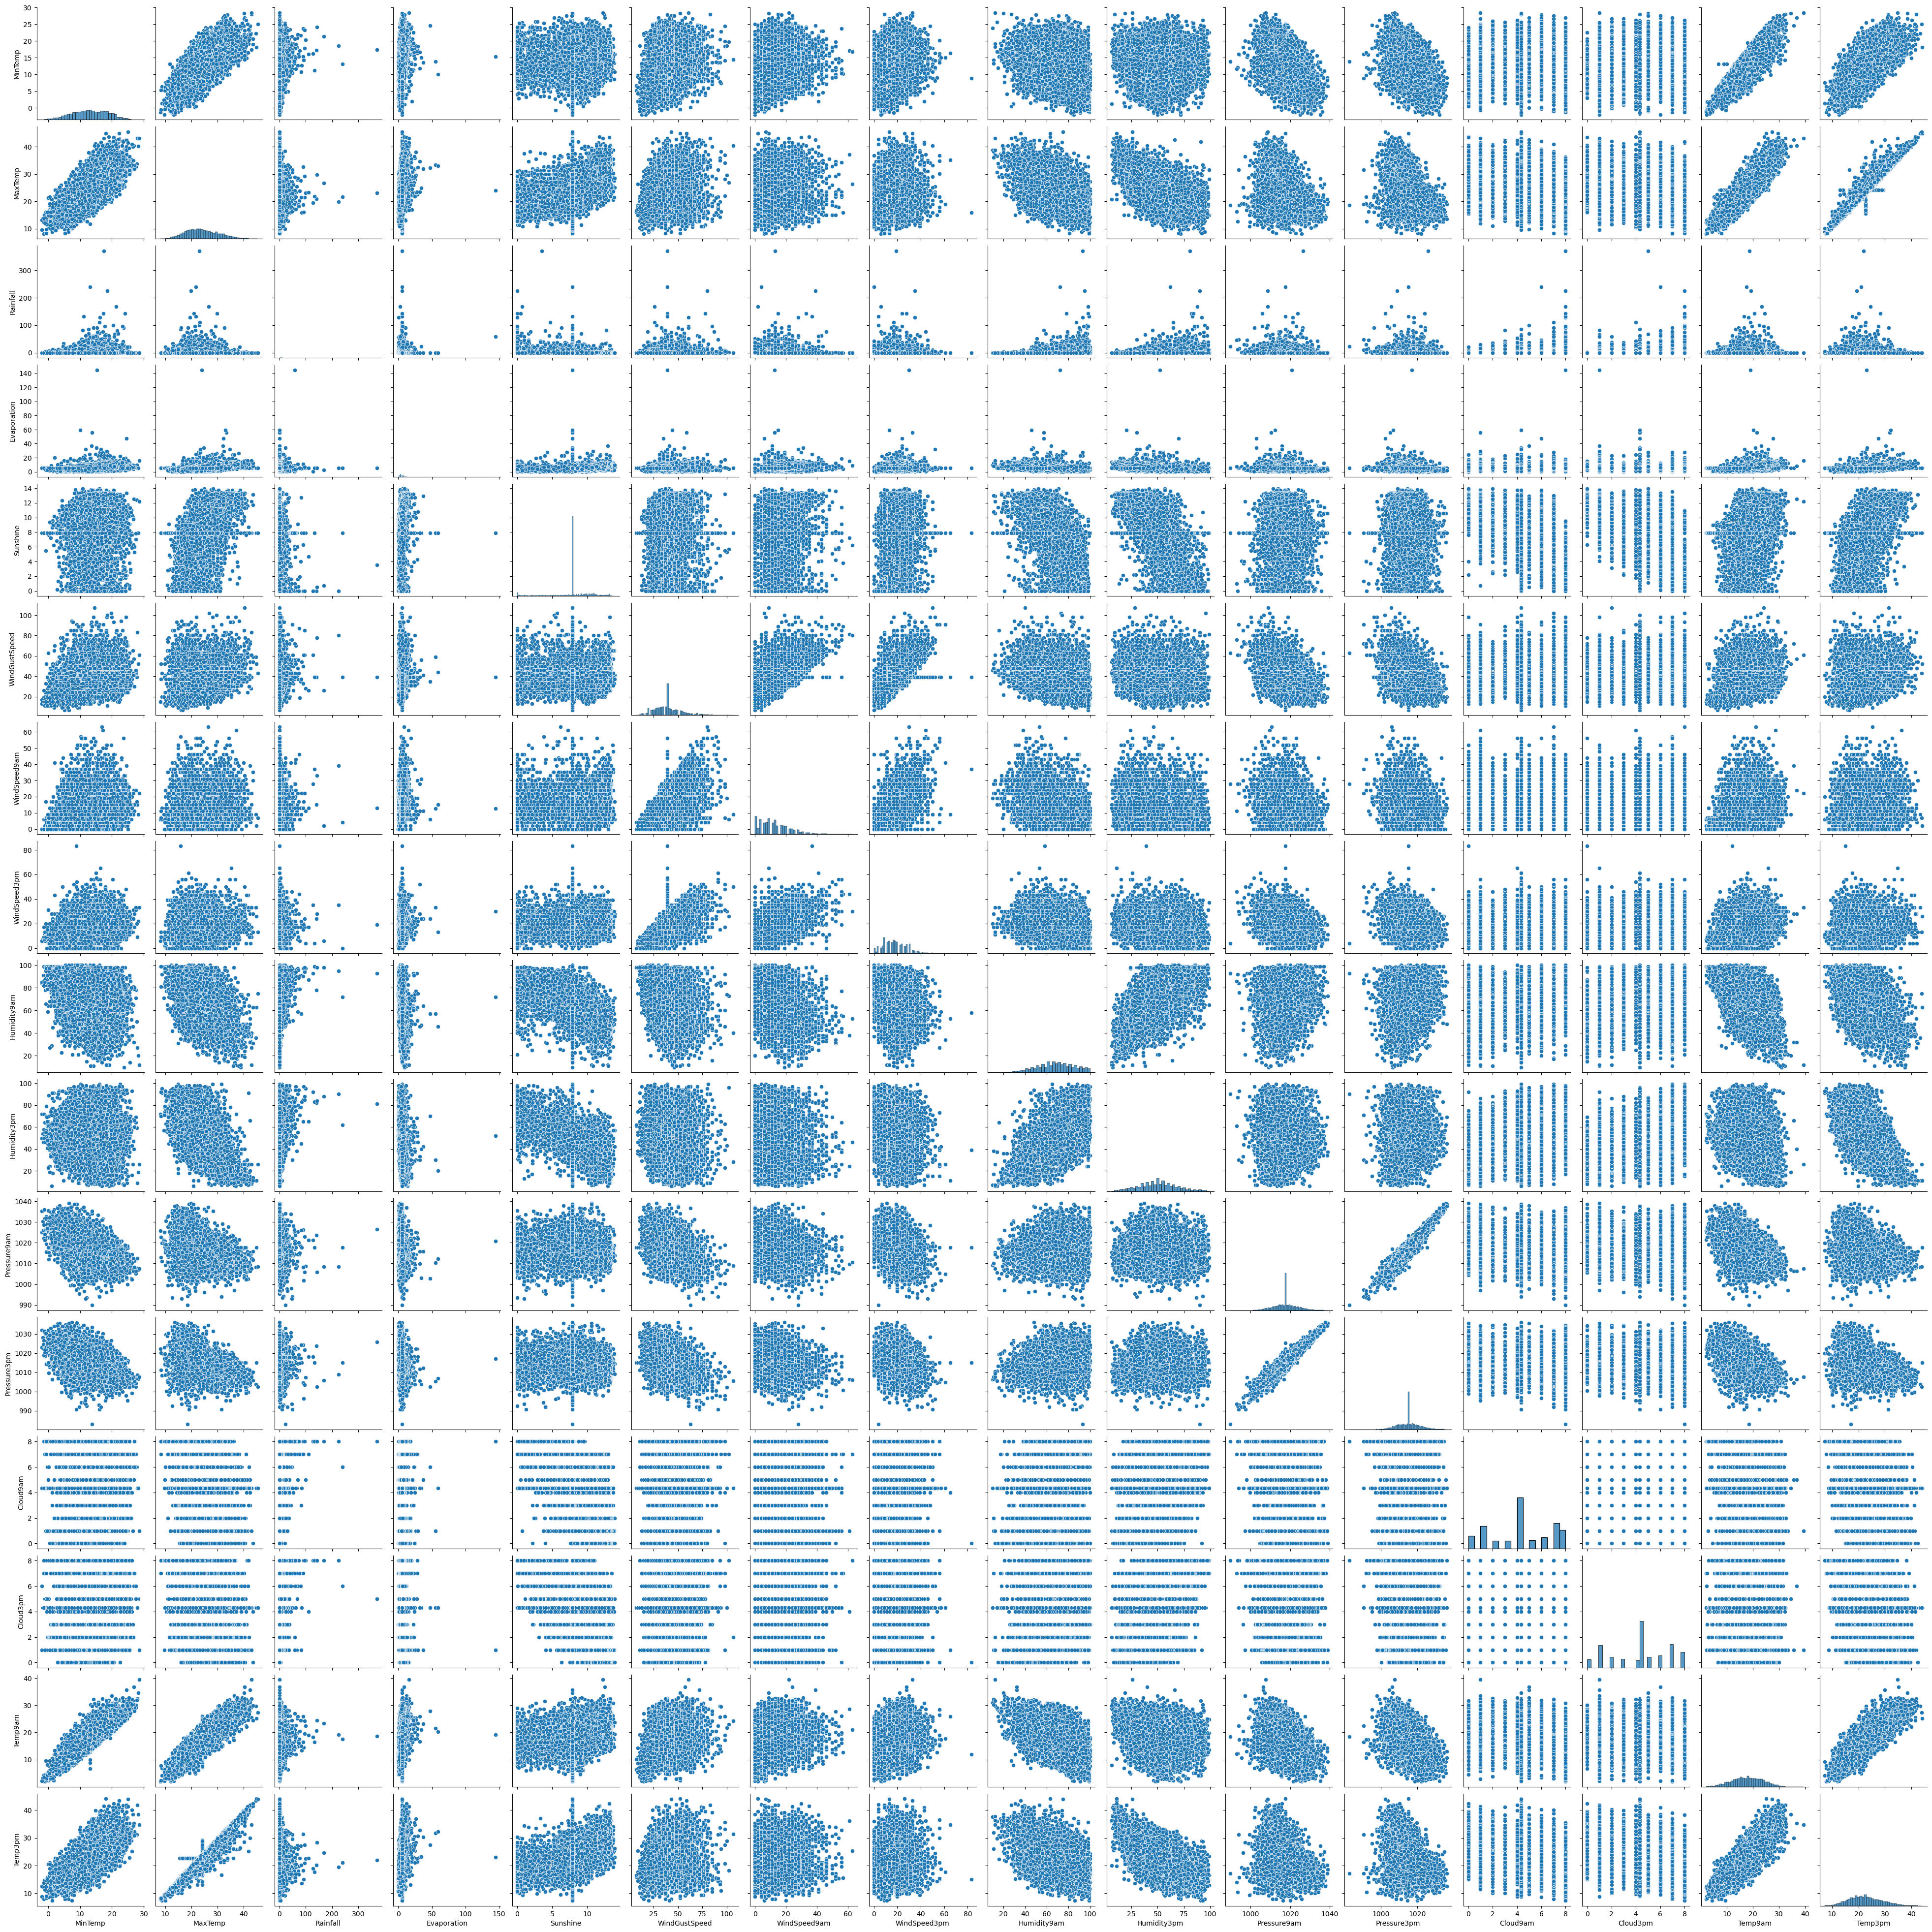

In [189]:
sns.pairplot(df)

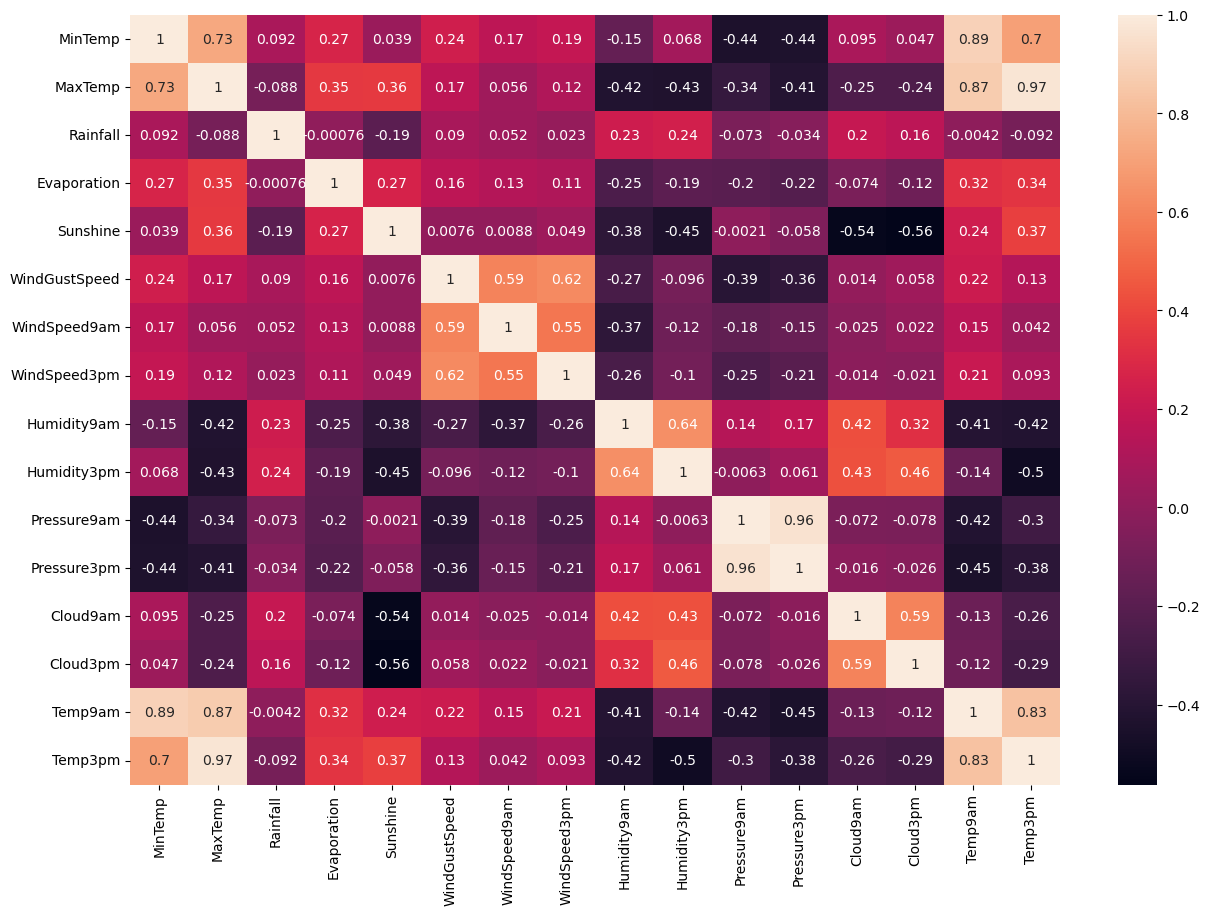

In [190]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [191]:
# check variable unique values and frequencies - Location
df.Location.value_counts()

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [192]:
# check variable unique values and frequencies - WindGustDir
df.WindGustDir.value_counts()

E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64

In [193]:
# check variable unique values and frequencies - WindDir9am
df.WindDir9am.value_counts()

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64

In [194]:
# check variable unique values and frequencies - WindDir3pm
df.WindDir3pm.value_counts()

SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64

In [196]:
# check variable unique values and frequencies - RainToday
df.RainToday.value_counts()

No     5190
Yes    1572
Name: RainToday, dtype: int64

In [197]:
# check variable unique values and frequencies - RainTomorrow
df.RainTomorrow.value_counts()

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64

There is need to remove RainTomorrow column as it has same value RainToday -the target variable

In [284]:
# A copy of the dataset is required so as to maintain the cleaned one for later uses.
# The copied one will be used for preparing the data for the model.
rain_df = df.copy()

# Data Preprocessing 

In [267]:
rain.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [297]:
rain_df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

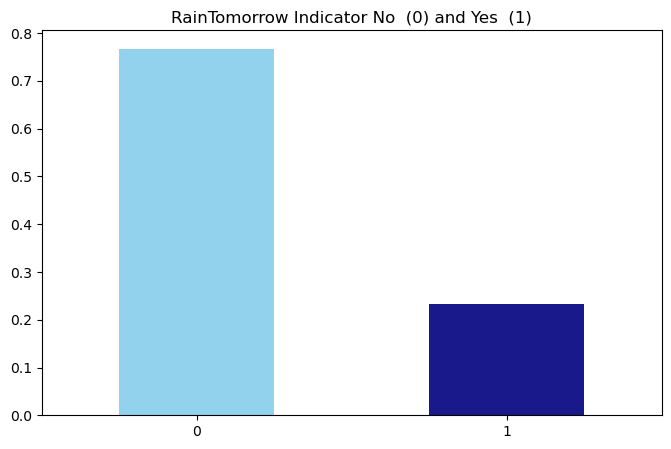

In [298]:
fig = plt.figure(figsize = (8,5))
rain_df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No  (0) and Yes  (1)')
plt.show()

It can be observed that presence of "0" and "1" are almost in the ratio 75:25. It implies there is a class imbalance and need to be handled. 
we are to use oversampling of minority class in this instanc since the size of the data set is quite small, undersampling of majority class would not make much sense here.

# Resolving Class Inbalance

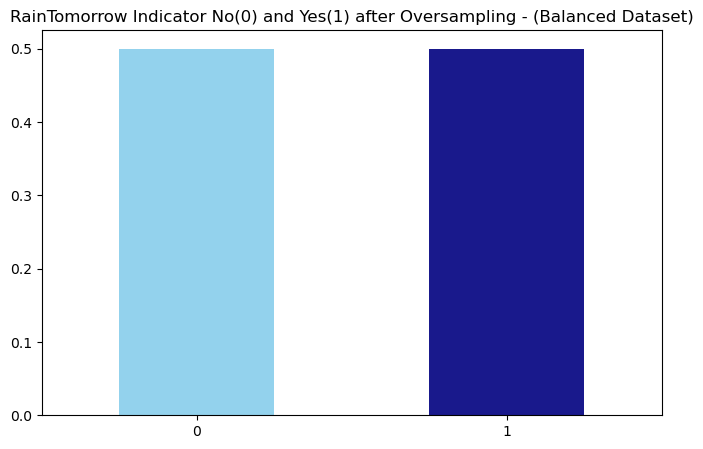

In [301]:
from sklearn.utils import resample

no = rain_df[rain_df.RainTomorrow == 0]
yes = rain_df[rain_df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling - (Balanced Dataset)')
plt.show()

In [289]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
rain_df['WindGustDir'] = label_encoder.fit_transform(rain_df['WindGustDir'])
rain_df['WindDir9am'] = label_encoder.fit_transform(rain_df['WindDir9am'])
rain_df['WindDir3pm'] = label_encoder.fit_transform(rain_df['WindDir3pm'])

In [302]:
rain_df.RainTomorrow.value_counts()

0    5190
1    1572
Name: RainTomorrow, dtype: int64

In [303]:
rain_df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.302395  7.890896   
1  2008-12-02   Albury      7.4     25.1       0.0     5.302395  7.890896   
2  2008-12-03   Albury     12.9     25.7       0.0     5.302395  7.890896   
3  2008-12-04   Albury      9.2     28.0       0.0     5.302395  7.890896   
4  2008-12-05   Albury     17.5     32.3       1.0     5.302395  7.890896   
5  2008-12-06   Albury     14.6     29.7       0.2     5.302395  7.890896   
6  2008-12-07   Albury     14.3     25.0       0.0     5.302395  7.890896   
7  2008-12-08   Albury      7.7     26.7       0.0     5.302395  7.890896   
8  2008-12-09   Albury      9.7     31.9       0.0     5.302395  7.890896   
9  2008-12-10   Albury     13.1     30.1       1.4     5.302395  7.890896   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   
5           14           56.0          13  ...         55.0         23.0   
6           13           50.0          12  ...         49.0         19.0   
7           13           35.0          10  ...         48.0         19.0   
8            6           80.0           9  ...         42.0          9.0   
9           13           28.0           8  ...         58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.320988     16.9     21.8          0   
1       1010.6       1007.8  4.336806  4.320988     17.2     24.3          0   
2       1007.6       1008.7  4.336806  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.336806  4.320988     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   
5       1009.2       1005.4  4.336806  4.320988     20.6     28.9          0   
6       1009.6       1008.2  1.000000  4.320988     18.1     24.6          0   
7       1013.4       1010.1  4.336806  4.320988     16.3     25.5          0   
8       1008.9       1003.6  4.336806  4.320988     18.3     30.2          0   
9       1007.0       1005.7  4.336806  4.320988     20.1     28.2          1   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             1  
9             0  

[10 rows x 23 columns]

Observations:
1. The original dataset was having the shape (8425, 23).
2. we remove 1663 duplicates from the dataset, left with 6762 
3. The dataset final shape after outliers removal is (2754, 23)
We will now check for multi-collinearity i.e. whether any feature is highly correlated with another.

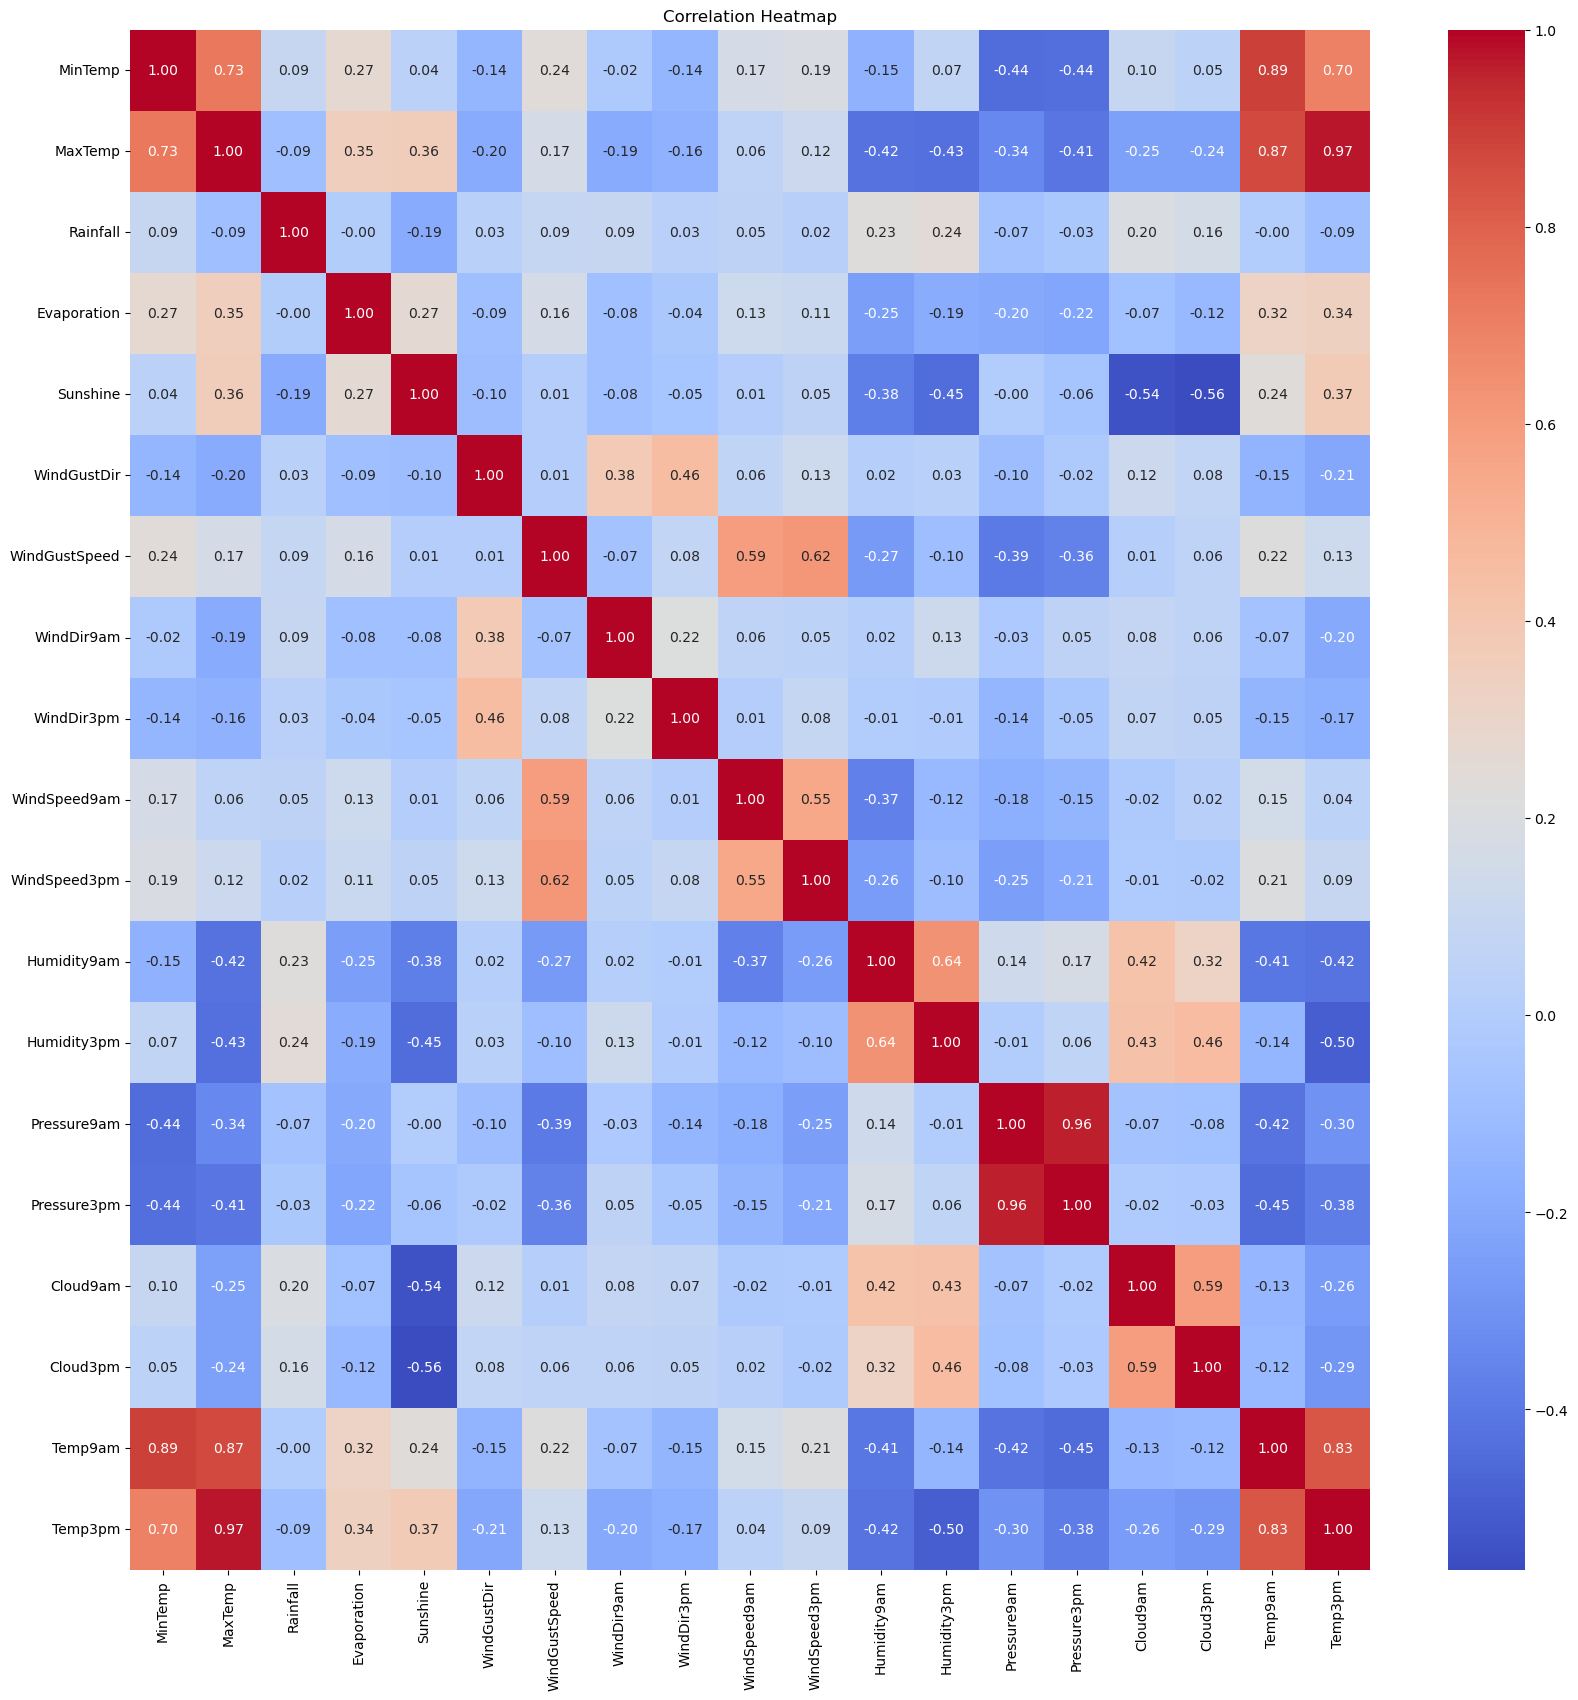

In [295]:
# Correlation Heatmap
corr = rain_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

observations;
The following pairs of variables have high correlations
1. MaxTemp and MinTemp
2. Pressure9am and Pressure3pm
3. Temp9am and Temp3pm
4. Evaporation and MaxTemp
4. MaxTemp and Temp3pm 
However, non of them is up to 1 point, and for this reason, no features shall be dropped.

# Feature selections
using filter method(Chi-square value)
We need to standise the data first so as to avoid negagtive values

In [304]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in rain_df.columns:
    lencoders[col] = LabelEncoder()
    rain[col] = lencoders[col].fit_transform(rain[col])

In [326]:
rain_df.drop('Location', axis=1, inplace=True)

In [319]:
# Detecting outliers with IQR
Q1 = rain_df.quantile(0.25)
Q3 = rain_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           8.400000
MaxTemp           8.800000
Rainfall          1.200000
Evaporation       1.302395
Sunshine          1.309104
WindGustDir      11.000000
WindGustSpeed    16.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     13.000000
Humidity9am      24.000000
Humidity3pm      24.000000
Pressure9am       6.700000
Pressure3pm       6.900000
Cloud9am          5.000000
Cloud3pm          3.000000
Temp9am           8.300000
Temp3pm           8.400000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64


In [320]:
# Identify numeric columns excluding non-numeric and date columns
numeric_cols = rain_df.select_dtypes(include=['number']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = rain_df[numeric_cols].quantile(0.25)
Q3 = rain_df[numeric_cols].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a condition to exclude rows with zero values for numeric columns
exclude_zeros = (rain_df[numeric_cols] != 0)

# Apply the condition to remove outliers while excluding rows with zero values
rain_df = rain_df[~(((df1[numeric_cols] < (Q1 - 1.5 * IQR)) | (df1[numeric_cols] > (Q3 + 1.5 * IQR))) & exclude_zeros).any(axis=1)]

In [327]:
rain_df.RainTomorrow.value_counts()

0    5190
1    1572
Name: RainTomorrow, dtype: int64

In [328]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(rain_df)
rain_df = pd.DataFrame(r_scaler.transform(rain_df), index=rain_df.index, columns=rain_df.columns)
rain_df.head(10)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.504918  0.394102  0.001617     0.036568   0.56769     0.866667   
1  0.308197  0.453083  0.000000     0.036568   0.56769     0.933333   
2  0.488525  0.469169  0.000000     0.036568   0.56769     1.000000   
3  0.367213  0.530831  0.000000     0.036568   0.56769     0.266667   
4  0.639344  0.646113  0.002695     0.036568   0.56769     0.866667   
5  0.544262  0.576408  0.000539     0.036568   0.56769     0.933333   
6  0.534426  0.450402  0.000000     0.036568   0.56769     0.866667   
7  0.318033  0.495979  0.000000     0.036568   0.56769     0.866667   
8  0.383607  0.635389  0.000000     0.036568   0.56769     0.400000   
9  0.495082  0.587131  0.003774     0.036568   0.56769     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           0.37    0.866667    0.933333      0.317460  ...     0.677778   
1           0.37    0.400000    1.000000      0.063492  ...     0.377778   
2           0.39    0.866667    1.000000      0.301587  ...     0.311111   
3           0.17    0.600000    0.000000      0.174603  ...     0.388889   
4           0.34    0.066667    0.466667      0.111111  ...     0.800000   
5           0.49    0.866667    0.866667      0.301587  ...     0.500000   
6           0.43    0.800000    0.866667      0.317460  ...     0.433333   
7           0.28    0.666667    0.866667      0.095238  ...     0.422222   
8           0.73    0.600000    0.466667      0.111111  ...     0.355556   
9           0.21    0.533333    0.666667      0.238095  ...     0.533333   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0     0.172043     0.363821     0.455744  1.000000  0.540123  0.400000   
1     0.204301     0.422764     0.468927  0.542101  0.540123  0.408000   
2     0.258065     0.361789     0.485876  0.542101  0.250000  0.509333   
3     0.107527     0.565041     0.563089  0.542101  0.540123  0.432000   
4     0.290323     0.426829     0.435028  0.875000  1.000000  0.424000   
5     0.182796     0.394309     0.423729  0.542101  0.540123  0.498667   
6     0.139785     0.402439     0.476460  0.125000  0.540123  0.432000   
7     0.139785     0.479675     0.512241  0.542101  0.540123  0.384000   
8     0.032258     0.388211     0.389831  0.542101  0.540123  0.437333   
9     0.225806     0.349593     0.429379  0.542101  0.540123  0.485333   

    Temp3pm  RainToday  RainTomorrow  
0  0.394022        0.0           0.0  
1  0.461957        0.0           0.0  
2  0.432065        0.0           0.0  
3  0.521739        0.0           0.0  
4  0.608696        0.0           0.0  
5  0.586957        0.0           0.0  
6  0.470109        0.0           0.0  
7  0.494565        0.0           0.0  
8  0.622283        0.0           1.0  
9  0.567935        1.0           0.0  

[10 rows x 21 columns]

In [329]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = rain_df.loc[:,rain_df.columns!='RainTomorrow']
y = rain_df[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


Observations:
The features from the above output have highe performamnce over others

the datset will be splitted into training (75%) and testing (25%) sets respectively. For getting better results, we will standardize our X_train and X_test data (i.e. features without target for training and testing data sets)

# Modelling - Training with Different Models

In [343]:
#Splitting the dataset into x and y 
X = rain_df.drop('RainTomorrow', axis=1)
y = rain_df['RainTomorrow']

In [344]:
rain_df.RainTomorrow.value_counts()

0.0    5190
1.0    1572
Name: RainTomorrow, dtype: int64

In [333]:
X

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1      145      115         5           16        19   
1        1         1       84      138         0           16        19   
2        2         1      139      144         0           16        19   
3        3         1      102      167         0           16        19   
4        4         1      186      210         7           16        19   
...    ...       ...      ...      ...       ...          ...       ...   
8420  1924         9       38      120         0           16        19   
8421  1925         9       46      140         0           16        19   
8422  1926         9       64      156         0           16        19   
8423  1927         9       88      157         0           16        19   
8424  1928         9      160      127         0           16        19   

      WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed3pm  Humidity9am  \
0              13             21          13  ...            14           51   
1              14             21           6  ...            13           23   
2              15             22          13  ...            15           17   
3               4              9           9  ...             5           24   
4              13             19           1  ...            12           62   
...           ...            ...         ...  ...           ...          ...   
8420            0             13           9  ...             6           30   
8421            6              8           9  ...             5           35   
8422            3             16           9  ...             5           32   
8423            9             11          10  ...             4           30   
8424            0             17           2  ...             9           41   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              16           27           41         9         5      141   
1              19           54           48         5         5      144   
2              24           26           57         5         2      183   
3              10          124           98         5         5      154   
4              27           56           31         8         9      150   
...           ...          ...          ...       ...       ...      ...   
8420           18          195          174         5         5       73   
8421           15          184          162         5         5       81   
8422           18          159          139         5         5       97   
8423           18          143          136         3         2      123   
8424           30          151          150         9         9      122   

      Temp3pm  RainToday  
0         114          0  
1         140          0  
2         129          0  
3         162          0  
4         194          0  
...       ...        ...  
8420      120          0  
8421      142          0  
8422      158          0  
8423      157          0  
8424      105          0  

[2754 rows x 22 columns]

In [345]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 6762, dtype: float64

In [346]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [347]:
print(X.shape, X_train.shape, y_test.shape)

(6762, 20) (5071, 20) (1691,)


In [348]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [349]:
# The problem is of classification and thus, the following models are being used to answer the problem statement
# logistic regression
# Random Forest
# Decision Tree
# Support Vector Machines

# Importing required libraries for the Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [350]:
# logistic regression
LR = LogisticRegression()

In [351]:
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8444707273802484
[[1219   76]
 [ 187  209]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1295
         1.0       0.73      0.53      0.61       396

    accuracy                           0.84      1691
   macro avg       0.80      0.73      0.76      1691
weighted avg       0.84      0.84      0.83      1691



In [353]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
predRandFor = RandFor.predict(X_test)
print(accuracy_score(y_test,predRandFor))
print(confusion_matrix(y_test,predRandFor))
print(classification_report(y_test,predRandFor))

0.8385570668243643
[[1265   30]
 [ 243  153]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      1295
         1.0       0.84      0.39      0.53       396

    accuracy                           0.84      1691
   macro avg       0.84      0.68      0.72      1691
weighted avg       0.84      0.84      0.81      1691



In [354]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
predDecTree = DecTree.predict(X_test)
print(accuracy_score(y_test,predDecTree))
print(confusion_matrix(y_test,predDecTree))
print(classification_report(y_test,predDecTree))

0.7723240685984625
[[1098  197]
 [ 188  208]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1295
         1.0       0.51      0.53      0.52       396

    accuracy                           0.77      1691
   macro avg       0.68      0.69      0.69      1691
weighted avg       0.77      0.77      0.77      1691



In [355]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
predsvmMod = svmMod.predict(X_test)
print(accuracy_score(y_test,predsvmMod))
print(confusion_matrix(y_test,predsvmMod))
print(classification_report(y_test,predsvmMod))

0.8432879952690716
[[1235   60]
 [ 205  191]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1295
         1.0       0.76      0.48      0.59       396

    accuracy                           0.84      1691
   macro avg       0.81      0.72      0.75      1691
weighted avg       0.83      0.84      0.83      1691



Observations:
logistic regression, Random forest and Support vector Machine seemed to the highest accuracy level of approximately 84%. but Logistic Regression showed the highest approximation and  thus, selected for the model

In [356]:
# Use the trained model to make predictions on the test data
predict_test = LR.predict(X_test)
predict_test

array([0., 0., 1., ..., 0., 0., 0.])

In [357]:
 #Create a DataFrame with the test dataset and predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predLR})
results

Actual  Predicted
28       1.0        0.0
2268     0.0        0.0
2839     0.0        1.0
665      0.0        0.0
7386     0.0        0.0
...      ...        ...
6702     0.0        0.0
43       0.0        0.0
96       0.0        0.0
1728     0.0        0.0
2451     0.0        0.0

[1691 rows x 2 columns]

In [358]:
# To convert loan status variable back to original categorial values of Yes or No
# Map numerical predictions back to "Yes" and "No" categories
predLR_category = ['Yes' if pred == 1 else 'No' for pred in predLR]

# Create a DataFrame with the test dataset and converted predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predLR_category})
results

Actual Predicted
28       1.0        No
2268     0.0        No
2839     0.0       Yes
665      0.0        No
7386     0.0        No
...      ...       ...
6702     0.0        No
43       0.0        No
96       0.0        No
1728     0.0        No
2451     0.0        No

[1691 rows x 2 columns]

In [359]:
# Save the DataFrame as a CSV file
results.to_csv('Rainfall Weather Forecasting.csv', index=False)

In [360]:
# saving the model using .pkl
import joblib
joblib.dump(RandFor, "Rainfall Weather Forecasting.pkl")

['Rainfall Weather Forecasting.pkl']

# Conclusion

it was observed that logistic regression, Random forest and Support vector Machine have performed better compared to other models. 